## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm,zscore

### 1.2 import and put the train and test datasets in  pandas dataframe

In [2]:
train = pd.read_csv('train-2.csv')
test = pd.read_csv('test.csv')

### 1.3 display the first five rows of the train dataset.

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

### 1.6 Save the 'Id' column

In [7]:
idx = ['Id']

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [8]:
train.drop(columns=idx,inplace=True)
test.drop(columns=idx,inplace=True)

### 1.8 check again the data size after dropping the 'Id' variable

In [9]:
train.shape

(1460, 80)

In [10]:
test.shape

(1459, 79)

## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

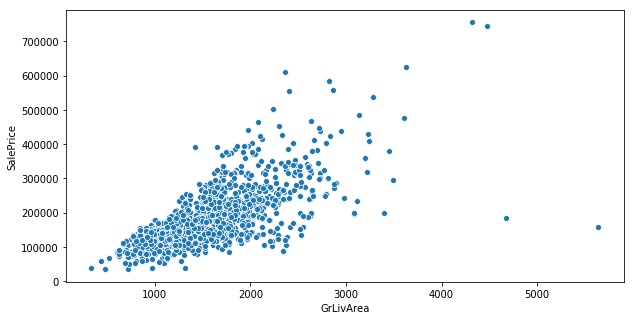

In [11]:
# create subplots 
fig,ax = plt.subplots(figsize=(10,5))

#create scatter plots for train['GrLivArea'],  train['SalePrice']
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

plt.show()

#### observation:


- there are some outliers on the right side and top of graph

### 1.9 b) Deleting outliers.And your observation?

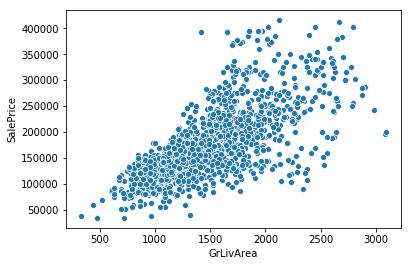

In [12]:
train2 = train[(abs(zscore(train['GrLivArea'])) <= 3) & (abs(zscore(train['SalePrice'])) <= 3)]

#Check the graphic again
#create scatterplot for train['GrLivArea'], train['SalePrice']
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train2)
plt.show()

#### observation:
  

- the outliers have been removed

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

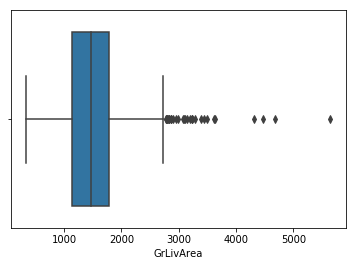

In [13]:
sns.boxplot(train['GrLivArea'])
plt.show()

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

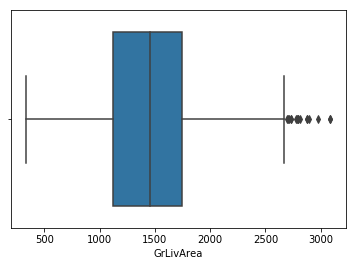

In [14]:
sns.boxplot(train2['GrLivArea'])
plt.show()

## 1.10 Checking the skeweness for saleprice.And your observation?

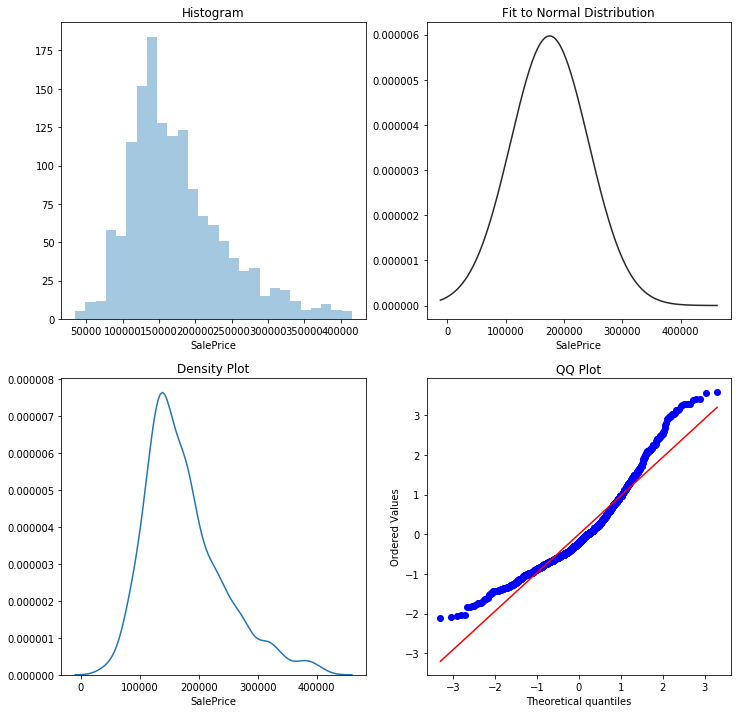

In [15]:
fig,ax = plt.subplots(2,2,figsize=(12,12))

# create histogram for saleprice
sns.distplot(train2['SalePrice'],kde=False,ax=ax[0,0])
ax[0,0].set_title('Histogram')

# Get the fitted parameters used by the function
sns.distplot(train2['SalePrice'],kde=False,hist=False,fit=norm,ax=ax[0,1])
ax[0,1].set_title('Fit to Normal Distribution')

#Now plot the distribution
sns.distplot(train2['SalePrice'],hist=False,ax=ax[1,0])
ax[1,0].set_title('Density Plot')

#Get also the QQ-plot
stats.probplot(zscore(train2['SalePrice']), dist='norm', plot=plt)
ax[1,1].set_title('QQ Plot')

plt.show()

### observation:


- SalePrice is right-skewed; not a perfect normal distribution

### 1.10 a) Apply Log-transformation of the target variable.And your observation?

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train2['log_sp'] = np.log1p(train2['SalePrice'])

C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


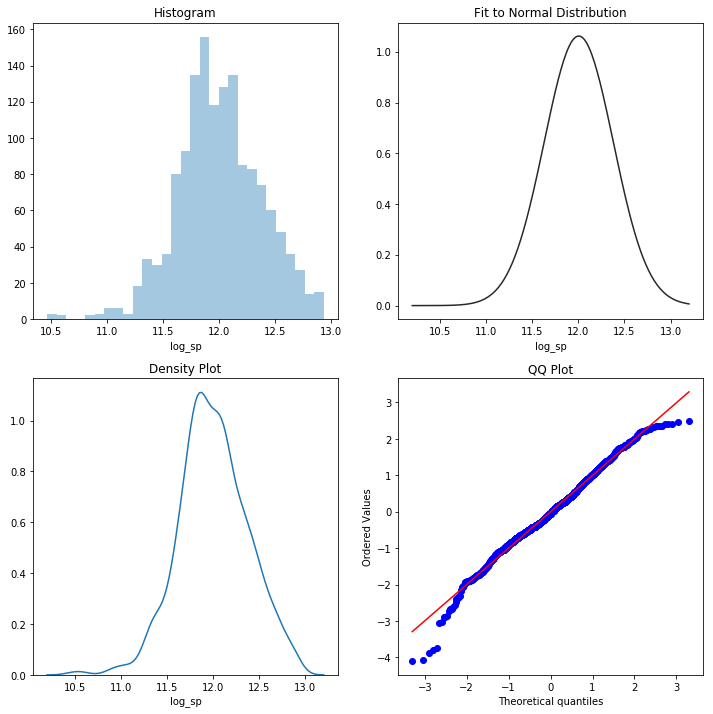

In [17]:
fig,ax = plt.subplots(2,2,figsize=(12,12))

#Check the new distribution 
sns.distplot(train2['log_sp'],kde=False,ax=ax[0,0])
ax[0,0].set_title('Histogram')

# Get the fitted parameters used by the function
sns.distplot(train2['log_sp'],kde=False,hist=False,fit=norm,ax=ax[0,1])
ax[0,1].set_title('Fit to Normal Distribution')

#Now plot the distribution
sns.distplot(train2['log_sp'],hist=False,ax=ax[1,0])
ax[1,0].set_title('Density Plot')

#Get also the QQ-plot
stats.probplot(zscore(train2['log_sp']), dist='norm', plot=plt)
ax[1,1].set_title('QQ Plot')

plt.show()

#### observation:


- Log transofrmation made the curve slightly left-skewed but closer to a normal distribution

### 1.11 concatenate the train and test data in the same dataframe

In [18]:
#all_data = pd.concat
all_data = pd.concat([train,test])

C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [19]:
# Drop the SalePrice
all_data.drop(columns='SalePrice',inplace=True)

In [20]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### 1.12 Cecking the all Missing Data?

In [21]:
all_null = all_data.isnull().sum()
missing = all_null[all_null > 0]
missing

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

### 1.13 plot the missing values using barplot?

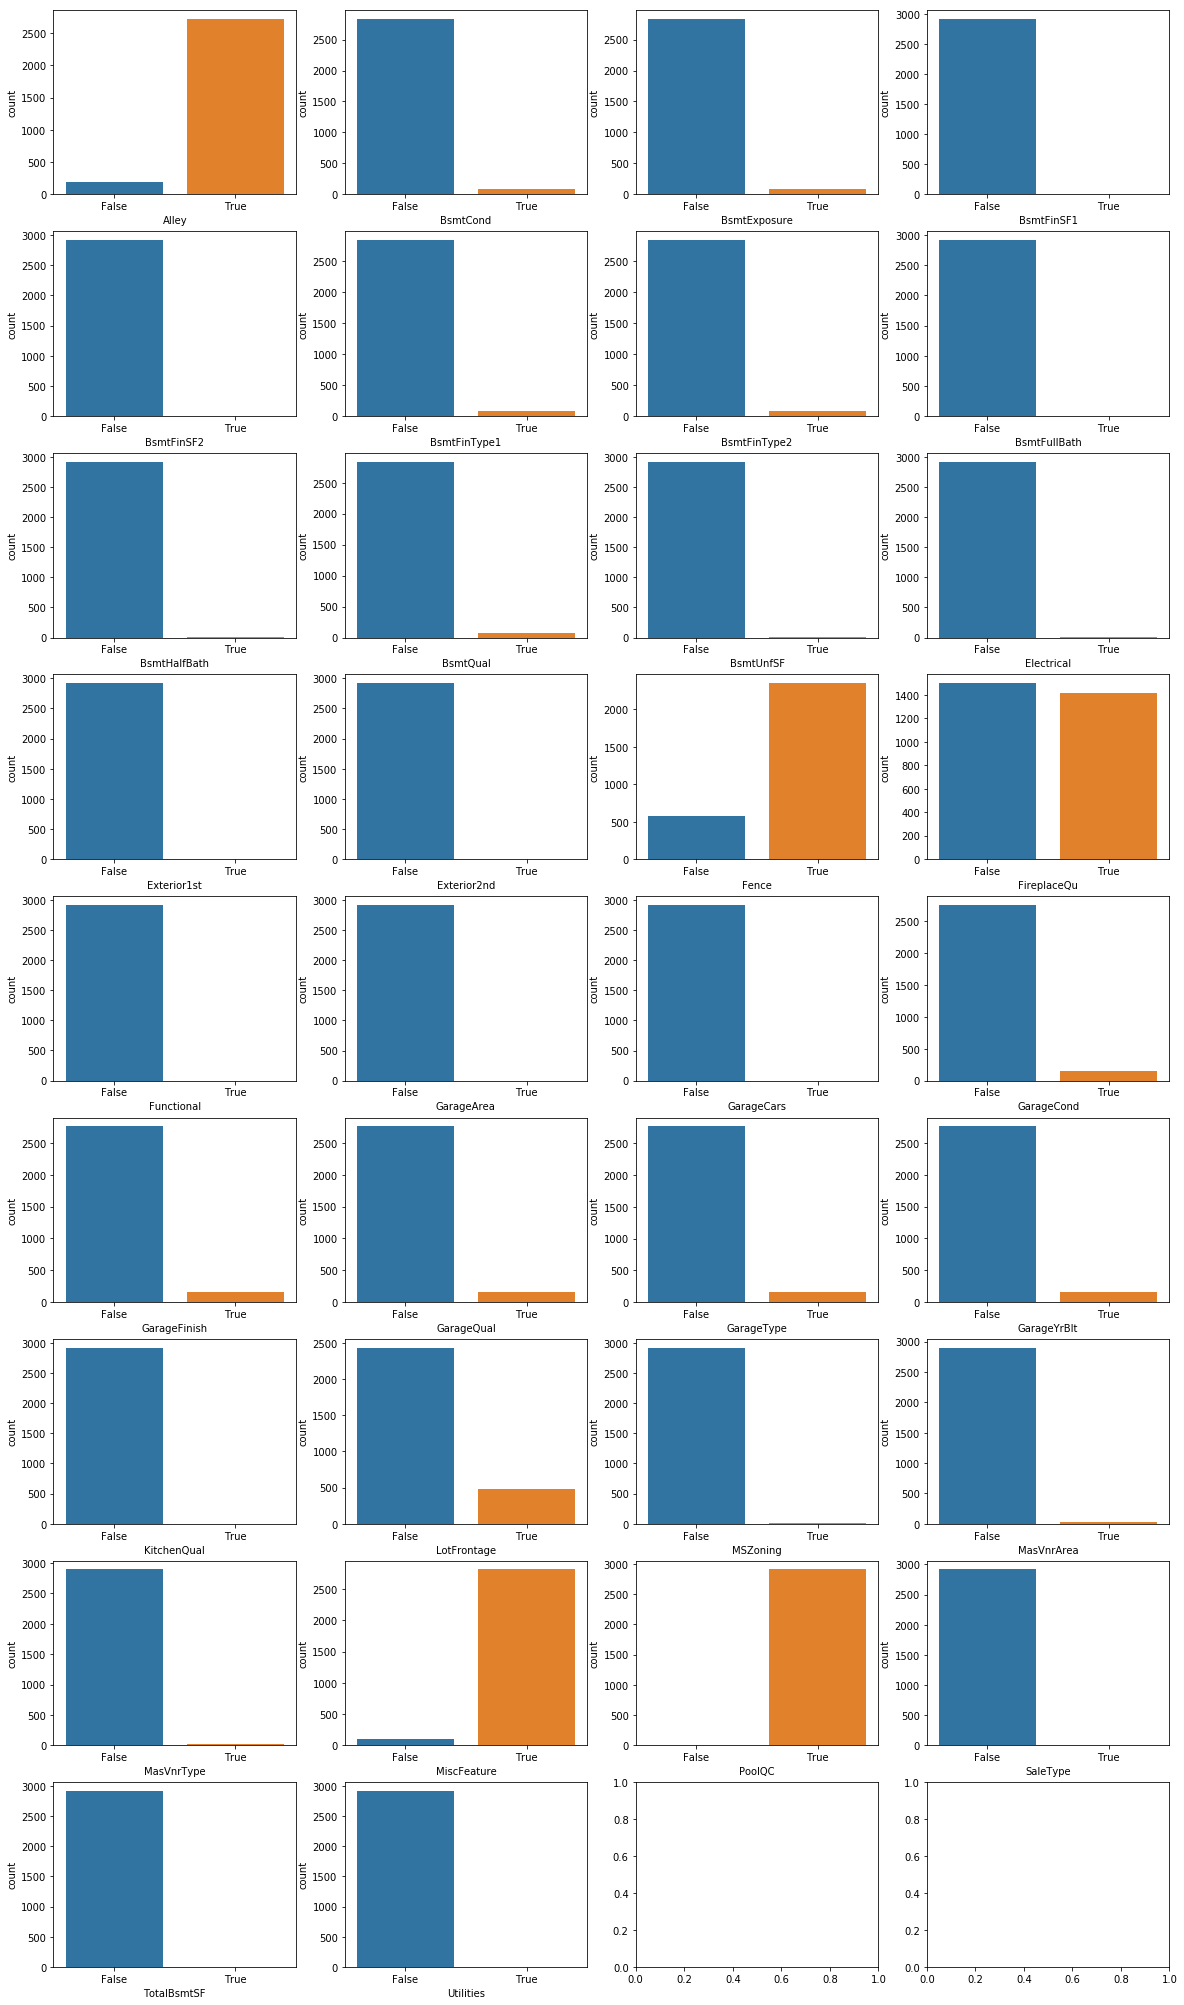

In [22]:
#create subplots
fig,ax = plt.subplots(9,4,figsize=(20,36))

#create barplot for all missing values
idx = 0
for i in range(9):
    for j in range(4):
        if idx < 34:
            sns.countplot(all_data[missing.index[idx]].isnull(),ax=ax[i,j])
            idx = idx+1
plt.show()

### 1.14 check the Data Correlation using heatmap.And your observation?

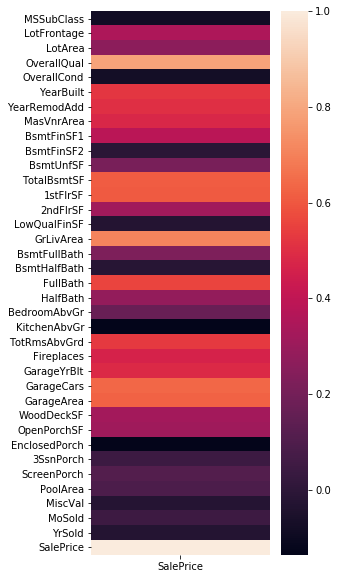

In [23]:
#Correlation map to see how features are correlated with SalePrice
plt.figure(figsize=(4,10))
sns.heatmap(DataFrame(train.corr().iloc[-1,:]))
plt.show()

#### observation:
   

- 'SalePrice' is best correlated with 'OverallQual'
- It is also moderately correlated with 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'

#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [24]:
all_data['PoolQC'].fillna('No Pool',inplace=True)

#### MiscFeature : 
data description says NA means "no misc feature"

In [25]:
all_data['MiscFeature'].fillna('no misc feature',inplace=True)

#### Alley : 
data description says NA means "no alley access"

In [26]:
all_data['Alley'].fillna('no alley access',inplace=True)

Fence : 
data description says NA means "no fence"

In [27]:
all_data['Fence'].fillna('no fence',inplace=True)

### 1.16 Check remaining missing values if any 

In [28]:
all_null = all_data.isnull().sum()
missing = all_null[all_null>0]
missing

BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [29]:
# FireplaceQu : data description says NA means "no fireplace"
all_data['FireplaceQu'].fillna('no fireplace',inplace=True)

In [30]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
median_lf = DataFrame(all_data.groupby('Neighborhood').median()['LotFrontage'])
median_lf

,LotFrontage
Neighborhood,
Blmngtn,43.0
Blueste,24.0
BrDale,21.0
BrkSide,51.0
ClearCr,80.5
CollgCr,70.0
Crawfor,70.0
Edwards,65.0
Gilbert,64.0


In [31]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
all_data['GarageType'].fillna('None',inplace=True)
all_data['GarageFinish'].fillna('None',inplace=True)
all_data['GarageQual'].fillna('None',inplace=True)
all_data['GarageCond'].fillna('None',inplace=True)

In [32]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
all_data['GarageYrBlt'].fillna(0,inplace=True)
all_data['GarageArea'].fillna(0,inplace=True)
all_data['GarageCars'].fillna(0,inplace=True)

In [33]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
all_data['BsmtFinSF1'].fillna(0,inplace=True)
all_data['BsmtFinSF2'].fillna(0,inplace=True)
all_data['BsmtUnfSF'].fillna(0,inplace=True)
all_data['TotalBsmtSF'].fillna(0,inplace=True)
all_data['BsmtFullBath'].fillna(0,inplace=True)
all_data['BsmtHalfBath'].fillna(0,inplace=True)

In [34]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
all_data['BsmtQual'].fillna('no basement',inplace=True)
all_data['BsmtCond'].fillna('no basement',inplace=True)
all_data['BsmtExposure'].fillna('no basement',inplace=True)
all_data['BsmtFinType1'].fillna('no basement',inplace=True)
all_data['BsmtFinType2'].fillna('no basement',inplace=True)

In [35]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data['MasVnrArea'].fillna(0,inplace=True)
all_data['MasVnrType'].fillna('None',inplace=True)

In [36]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'].fillna('RL',inplace=True)

In [37]:
#Functional : data description says NA means typical
all_data['Functional'].fillna('typical',inplace=True)

In [38]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'].fillna('Sbrkr',inplace=True)

In [39]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'].fillna('TA',inplace=True)

In [40]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0],inplace=True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0],inplace=True)

In [41]:
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'].fillna('WD',inplace=True)

In [42]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'].fillna('None',inplace=True)

### 1.17 Check again remaining missing values if any.And your observation?

In [43]:
all_null = all_data.isnull().sum()
missing = all_null[all_null>0]
missing

LotFrontage    486
Utilities        2
dtype: int64

#### observation:
    

# 1.18 features engeneering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [44]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].astype('category')

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype('category')

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype('category')
all_data['MoSold'] = all_data['MoSold'].astype('category')

#### 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [65]:
# process columns, apply LabelEncoder to categorical features
for col in all_data.select_dtypes(include='category').columns:
    all_data[col] = all_data[col].cat.codes
# shape        
all_data.shape

(2919, 79)

### 1.19 Introduction to Test and Train


In [66]:
from sklearn.model_selection import train_test_split

### 1.20 Extract the independent variable X and dependent variable Y?

### 1.21 Split the data into train and test set(70/30)?

In [68]:
train, test = train_test_split(all_data,test_size=0.3,random_state=2)

# The End